In [2]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\HP\Desktop\INTERNSHIP -Skillcraft\titanic\train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#Data cleaning 
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


In [38]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [40]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


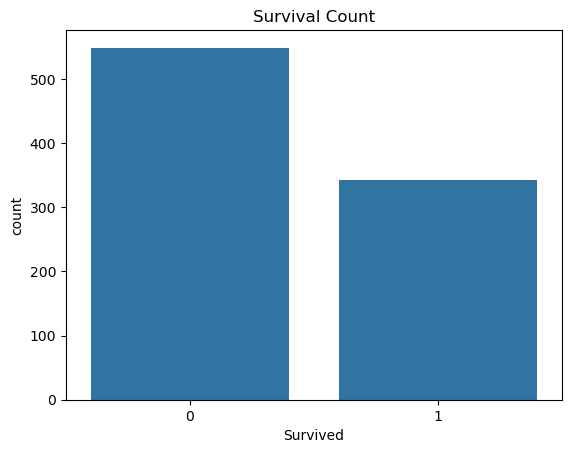

In [44]:

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


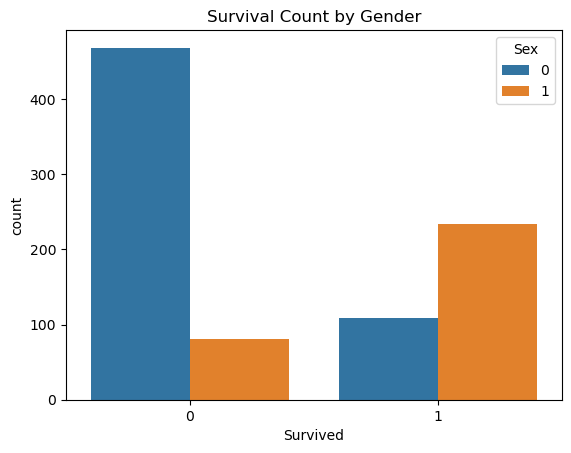

In [46]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()


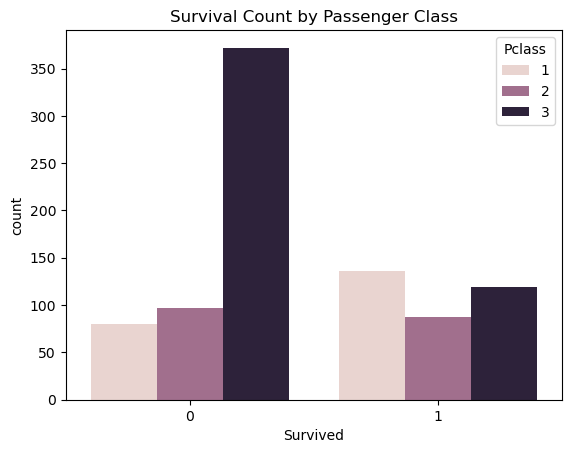

In [48]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


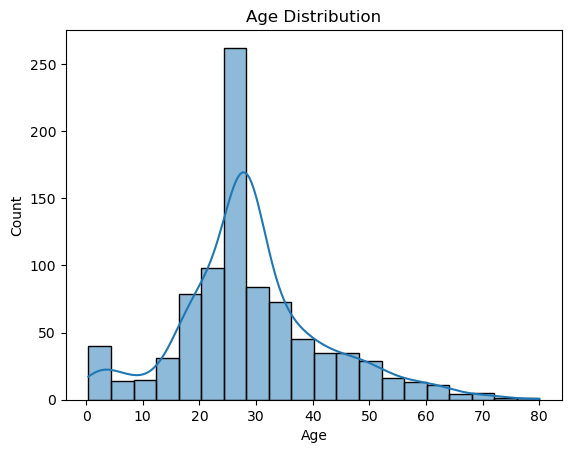

In [50]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


In [52]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
print(numeric_df.corr()['Survived'].sort_values(ascending=False))


Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


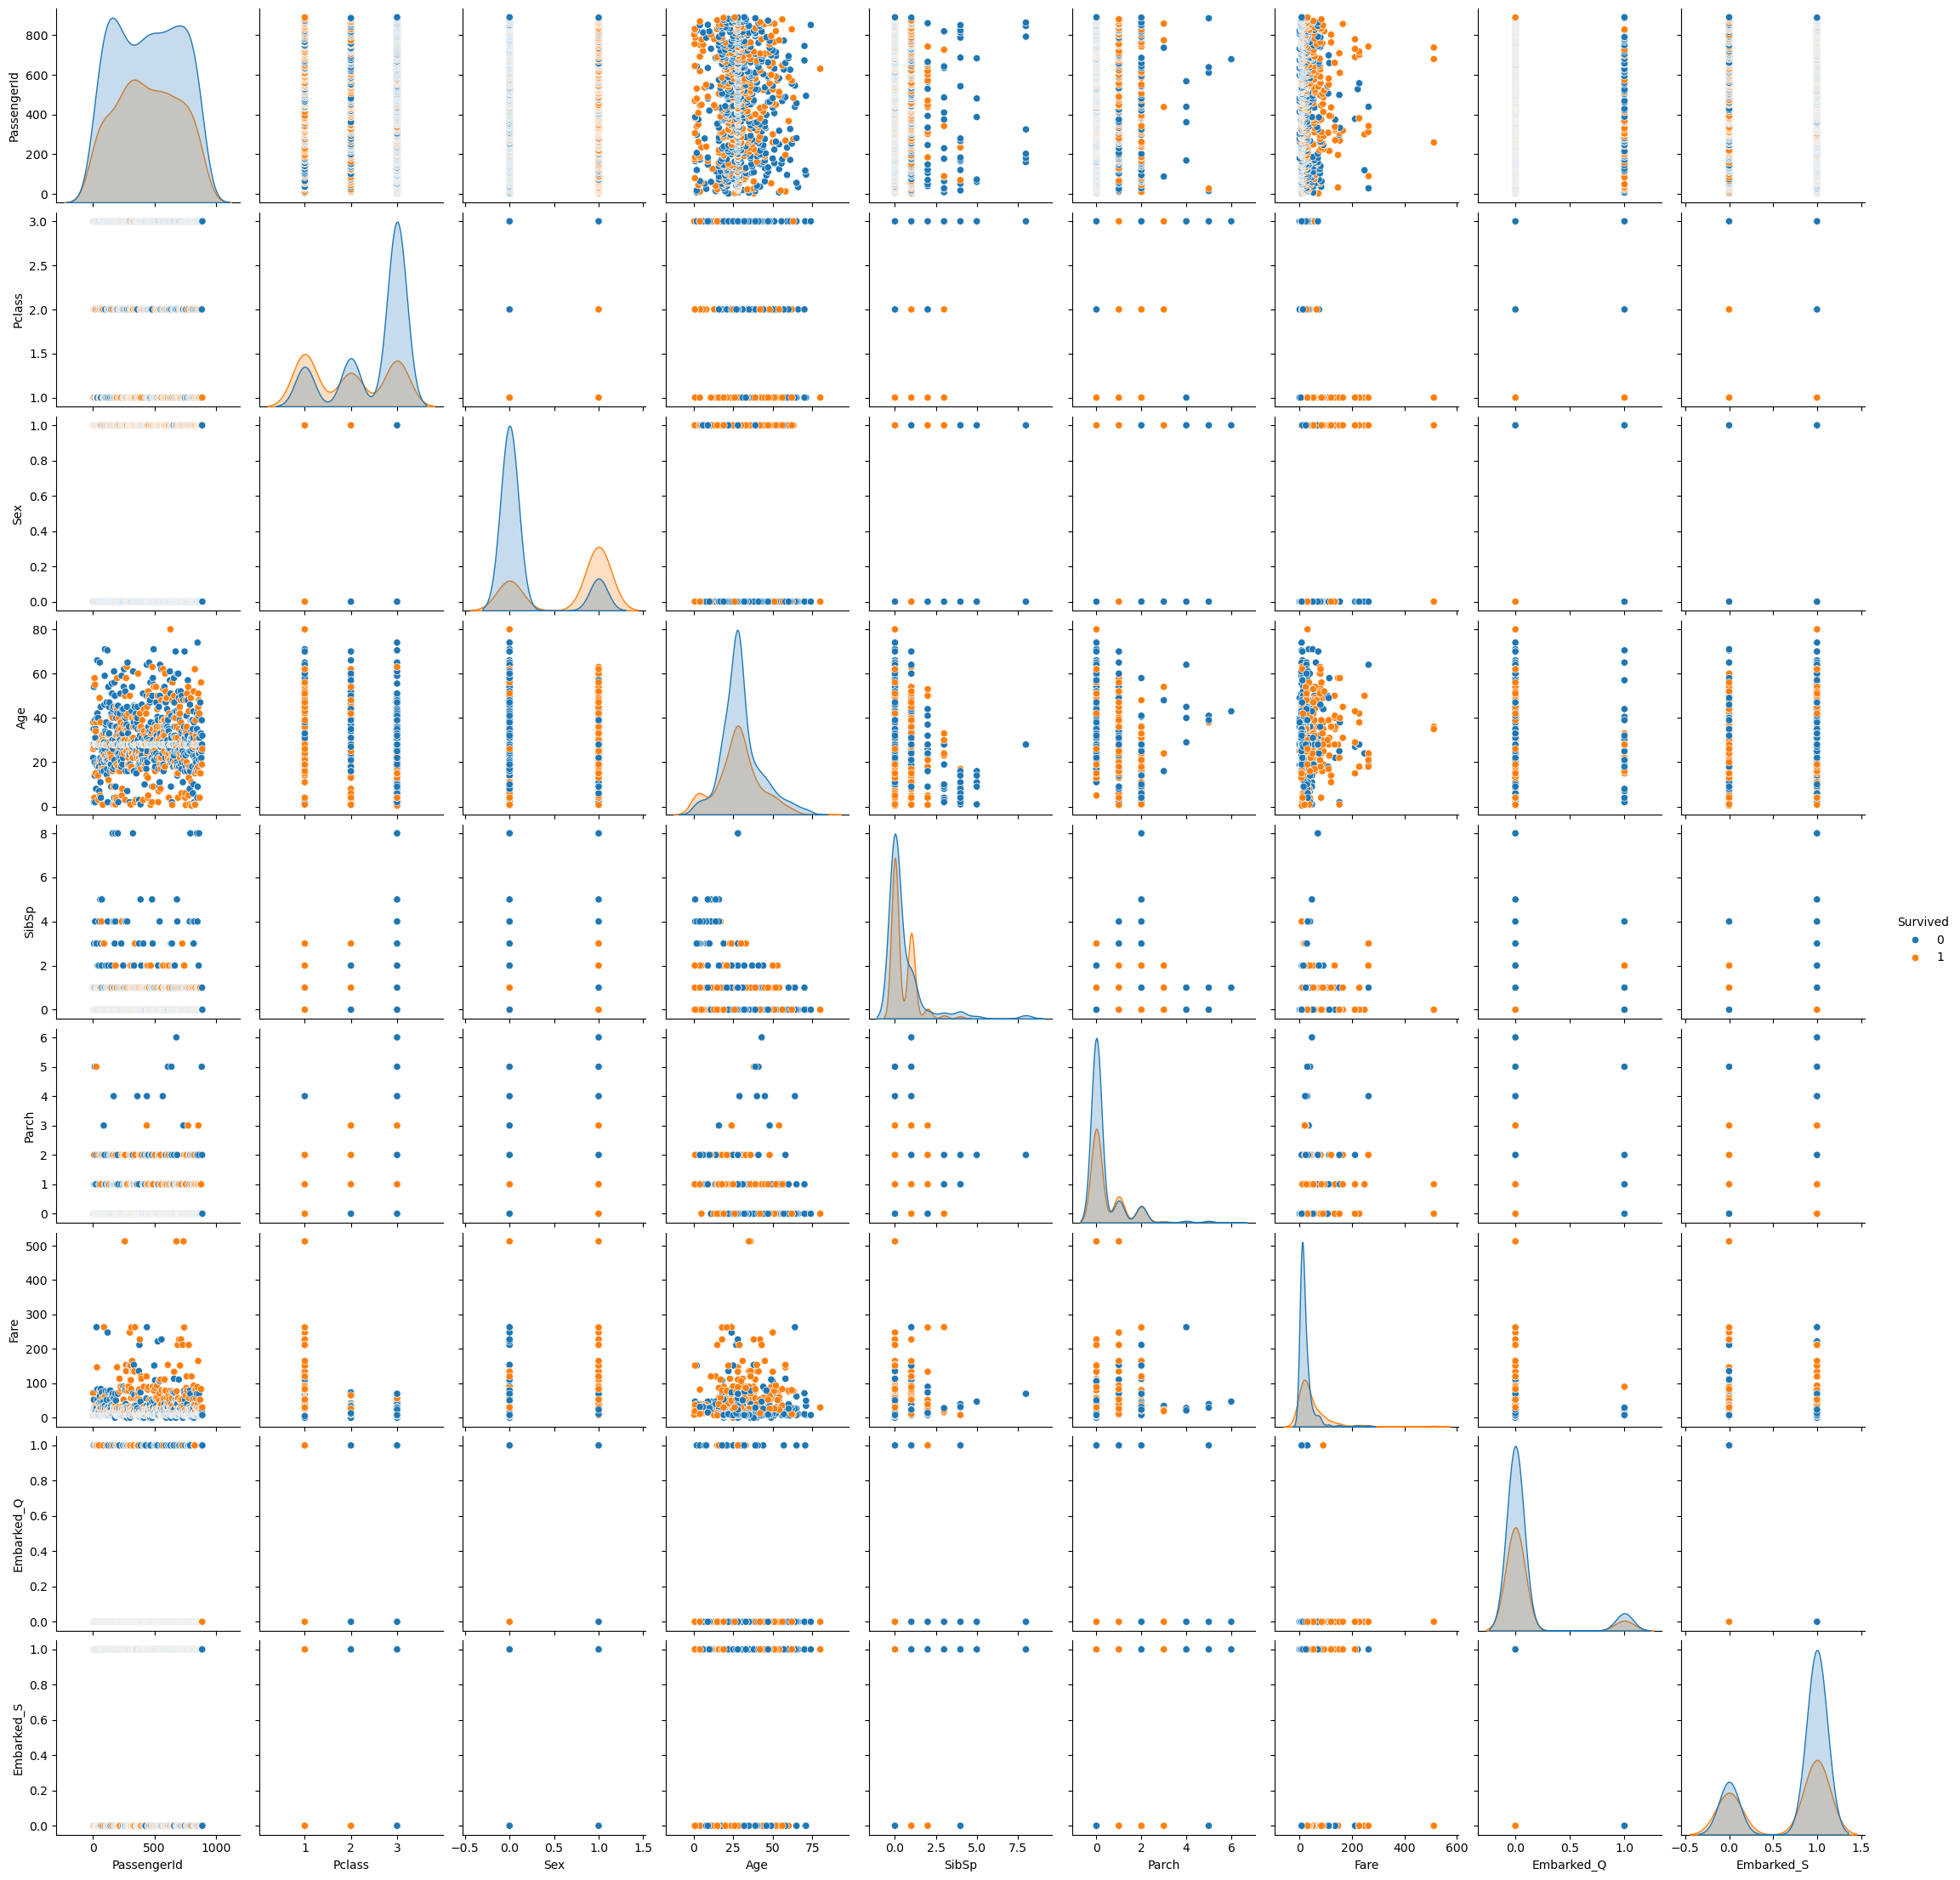

In [54]:
sns.pairplot(df, hue="Survived")
plt.show()
